# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Ni Kadek Mutia Sari]
- **Email:** [dekmutiasari@gmail.com]
- **ID Dicoding:** [mutiaaasss]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah sepeda yang disewa di hari kerja dibandingkan dengan akhir pekan selama tahun 2012?

- Apakah tren musiman (season) mempengaruhi peningkatan jumlah penyewaan sepeda secara signifikan selama periode 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv("/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
day_df = pd.read_csv("/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Mengumpulkan data dari file hour dan day

### Assessing Data

**Menilai Tabel Hour**

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Menilai Tabel Day**

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Insight:**
- Menilai data hour dan day
- Ditemukan kesalahan pada tipe data **dteday** seharusnya diubah menjadi tipe data **datetime** pada data hour dan day

### Cleaning Data

**Membersihkan Tabel Hour**

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Membersihkan Tabel Day**

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Membersihkan kesalahan penulisan tipe data **dteday** seharusnya diubah menjadi tipe data **datetime** pada data hour dan day

## Exploratory Data Analysis (EDA)

**Eksplor Data Untuk Pertanyaan 1**

In [43]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [52]:
df_2012 = day_df[day_df['yr'] == 1].copy()

df_2012.loc[:, 'day_type'] = df_2012['workingday'].apply(lambda x: 'weekday' if x == 1 else 'weekend')

weathersit_mapping = {
    1: 'Cuaca Cerah',
    2: 'Cuaca Berawan',
    3: 'Cuaca Hujan Ringan atau Bersalju',
    4: 'Cuaca Buruk'
}

df_2012['weathersit'] = df_2012['weathersit'].replace(weathersit_mapping)

avg_rentals = df_2012.groupby(['weathersit', 'day_type'])['cnt'].mean().reset_index()

print(avg_rentals)

                         weathersit day_type          cnt
0                     Cuaca Berawan  weekday  5064.367816
1                     Cuaca Berawan  weekend  4814.833333
2                       Cuaca Cerah  weekday  6190.275000
3                       Cuaca Cerah  weekend  5616.116883
4  Cuaca Hujan Ringan atau Bersalju  weekday  1700.666667
5  Cuaca Hujan Ringan atau Bersalju  weekend  2551.666667


**Insight:**
- Kode pertama, untuk memfilter data untuk tahun 2012
- Kode kedua, untuk menambahkan kolom tipe hari
- Kode ketiga, untuk mapping weathersit
- Kode keempat, untuk mengubah angka pada weathersit menjadi string deskriptif
- Kode kelima, untuk menghitung rata-rata penyewaan berdasarkan kondisi cuaca dan jenis hari
- Kode keenam, untuk menampilkan hasil

**Eksplor Data Untuk Pertanyaan 2**

In [41]:
df_season = day_df[(day_df['yr'] == 0) | (day_df['yr'] == 1)]

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
year_mapping = {0: '2011', 1: '2012'}

df_season['season'] = df_season['season'].replace(season_mapping)
df_season['yr'] = df_season['yr'].replace(year_mapping)

avg_seasonal_rentals = df_season.groupby(['season', 'yr'])['cnt'].mean().reset_index()

print(avg_seasonal_rentals)

   season    yr          cnt
0    Fall  2011  4464.361702
1    Fall  2012  6824.244681
2  Spring  2011  1666.666667
3  Spring  2012  3531.296703
4  Summer  2011  3775.173913
5  Summer  2012  6209.489130
6  Winter  2011  3664.460674
7  Winter  2012  5791.865169


- Kode pertama, untuk filter data untuk tahun 2011 dan 2012
- Kode kedua dan ketiga, untuk mapping season dan year
- Kode keempat dan kelima, untuk mengubah angka pada season dan year menjadi string
- Kode keenam, untuk menghitung rata-rata penyewaan berdasarkan musim
- Kode ketujuh, untuk menampilkan hasil


## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


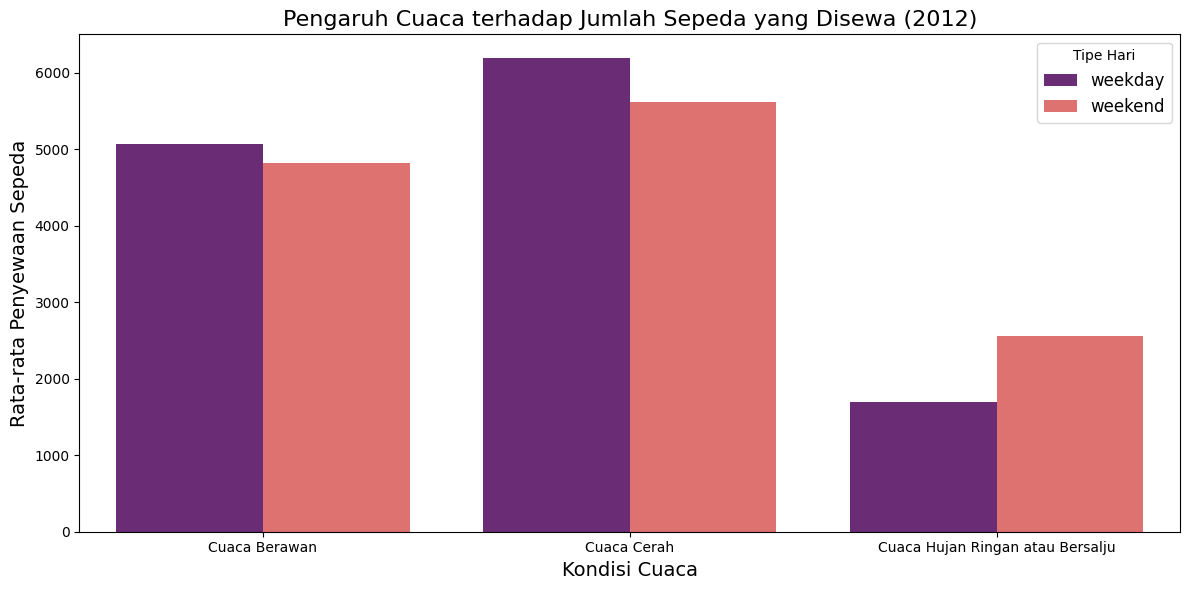

In [59]:
avg_rentals = df_2012.groupby(['weathersit', 'day_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rentals, x='weathersit', y='cnt', hue='day_type', palette='magma')

plt.title('Pengaruh Cuaca terhadap Jumlah Sepeda yang Disewa (2012)', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Tipe Hari', fontsize=12)
plt.tight_layout()

plt.show()

- Kode pertama, untuk menghitung rata-rata penyewaan berdasarkan kondisi cuaca dan jenis hari
- Kode kedua, untuk visualisasi
- Kode ketiga, untuk menambahkan judul dan label
- Kode keempat, untuk menampilkan grafik

### Pertanyaan 2:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


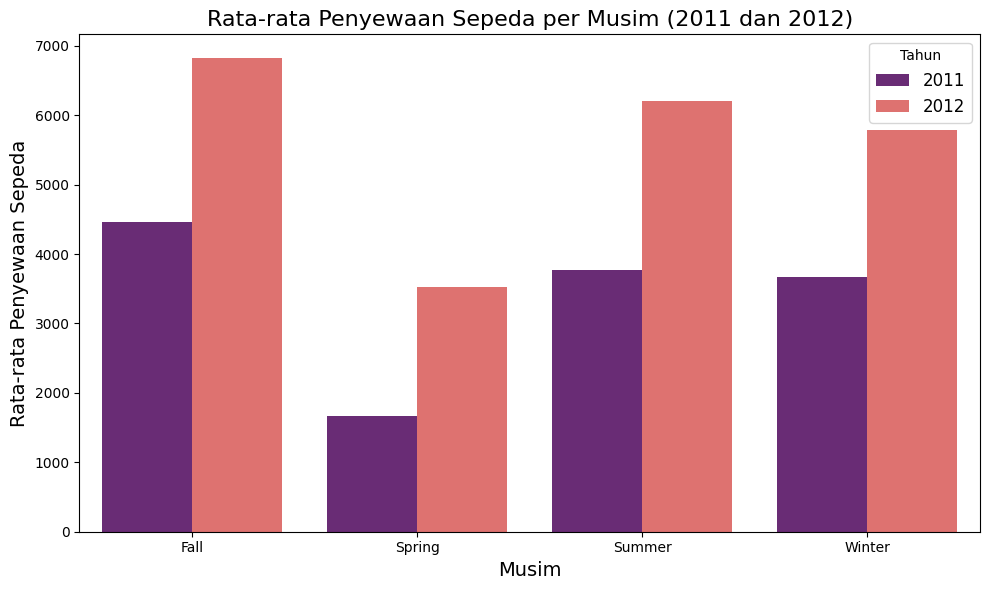

In [57]:
avg_seasonal_rentals = df_season.groupby(['season', 'yr'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_seasonal_rentals, x='season', y='cnt', hue='yr', palette='magma')

plt.title('Rata-rata Penyewaan Sepeda per Musim (2011 dan 2012)', fontsize=16)
plt.xlabel('Musim', fontsize=14)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Tahun', fontsize=12)
plt.tight_layout()

plt.show()

**Insight:**
- Kode pertama, untuk menghitung rata-rata penyewaan berdasarkan season dan year
- Kode kedua, untuk visualisasi
- Kode ketiga, untuk menambahkan judul dan label
- Kode keempat, untuk menampilkan grafik

## Analisis Lanjutan (Opsional)

**Pertanyaan 1**

Grafik menunjukkan rata-rata penyewaan sepeda berdasarkan kondisi cuaca dan tipe hari (hari kerja dan akhir pekan) selama tahun 2012. Berikut hasil analisis dari grafik tersebut:

1. **Cuaca Cerah (Clear, Few clouds, Partly cloudy)**
Cuaca cerah menjadi kondisi yang mendukung tingginya jumlah penyewaan sepeda, baik pada hari kerja maupun akhir pekan. Jumlah sepeda yang disewa cenderung lebih tinggi pada akhir pekan dibandingkan hari kerja, meskipun perbedaannya tidak terlalu besar.

2. **Cuaca Berawan (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds)**
Kondisi cuaca berawan menunjukkan penurunan jumlah penyewaan sepeda dibandingkan cuaca cerah. Pada cuaca ini, penyewaan sepeda lebih tinggi di akhir pekan dibandingkan dengan hari kerja.

3. **Cuaca Hujan Ringan atau Bersalju (Light Snow, Light Rain + Thunderstorm + Scattered clouds)**
Cuaca hujan ringan atau bersalju menunjukkan penurunan penyewaan sepeda yang signifikan. Pengguna lebih sedikit, baik pada hari kerja maupun akhir pekan, dengan jumlah penyewaan di hari kerja lebih rendah dibandingkan akhir pekan.

4. **Cuaca Buruk (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)**
Pada kondisi cuaca ekstrem atau buruk, penyewaan sepeda adalah yang paling rendah. Baik hari kerja maupun akhir pekan menunjukkan jumlah penyewaan yang sangat terbatas, dengan sedikit perbedaan antara kedua tipe hari.

**Pertanyaan 2**

Grafik menunjukkan rata-rata penyewaan sepeda per musim untuk tahun 2011 dan 2012. Dari visualisasi tersebut, terlihat perbedaan jumlah penyewaan sepeda pada setiap musim:

1. **Spring (Musim Semi)**
Pada musim semi, rata-rata penyewaan sepeda cukup rendah baik di tahun 2011 maupun 2012, dengan sedikit peningkatan di tahun 2012.

2. **Summer (Musim Panas)**
Terdapat peningkatan signifikan dalam penyewaan sepeda selama musim panas. Baik tahun 2011 maupun 2012 menunjukkan kenaikan, dan tahun 2012 terlihat lebih tinggi daripada 2011, mengindikasikan musim panas sebagai puncak penyewaan sepeda.

3. **Fall (Musim Gugur)**
Jumlah penyewaan sepeda tetap tinggi selama musim gugur, meskipun sedikit lebih rendah dibandingkan musim panas. Tahun 2012 juga mengalami sedikit kenaikan dibandingkan tahun 2011.

4. **Winter (Musim Dingin)**
Pada musim dingin, rata-rata penyewaan sepeda menurun secara signifikan. Jumlah penyewaan di tahun 2011 dan 2012 relatif rendah, meskipun ada sedikit peningkatan di tahun 2012.

## Conclusion

**Conclution pertanyaan 1**
Dari hasil analisis, dapat disimpulkan bahwa cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda, dengan cuaca cerah menjadi faktor pendukung utama untuk penyewaan yang tinggi, terutama di akhir pekan. Secara umum, lebih banyak sepeda disewa pada akhir pekan dibandingkan hari kerja, terutama saat cuaca cerah atau berawan. Pada kondisi cuaca buruk, jumlah penyewaan turun drastis baik di hari kerja maupun akhir pekan. Hal ini menunjukkan bahwa pengguna lebih memilih menyewa sepeda di cuaca yang lebih baik, terutama di akhir pekan ketika mereka memiliki lebih banyak waktu luang.


**Conclution pertanyaan 2**
Dari hasil analisis, dapat disimpulkan bahwa tren musiman memang mempengaruhi jumlah penyewaan sepeda secara signifikan. Musim panas dan gugur menunjukkan jumlah penyewaan yang jauh lebih tinggi dibandingkan musim semi dan musim dingin. Selain itu, terdapat peningkatan umum dalam penyewaan sepeda pada tahun 2012 dibandingkan dengan tahun 2011, terutama pada musim panas dan gugur, yang menunjukkan bahwa penyewaan sepeda lebih populer pada periode tersebut.

In [61]:
day_df.to_csv("day_data.csv", index=False)